Crea un notebook de Jupyter con el nombre "tarea6.ipynb" y realiza en el los siguientes pasos.

Realiza un análisis exploratorio de los datos del dataset "data/life_expectancy.csv".

Trata los valores no disponibles con las estrategias explicadas en los apuntes justificando la elección de cada una de ellas.

Compara al menos dos modelos para predicción de la esperanza de vida y evalúa su rendimiento.

Crea un pipeline de scikit-learn que incluya el preprocesamiento de los datos y el modelo de predicción elegido.

# Análisis exploratorio de los datos del dataset "data/life_expectancy.csv".

## Cargamos el dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Cargar el dataset
file_path = "./data/life_expectancy.csv"

data = pd.read_csv(file_path)

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)
len(train_set), len(test_set)


(2350, 588)


 ## Realizaremos un análisis de los datos

### Mostramos los primeros 10 registros para hacernos una primera idea de los datos con los que vamos a trabajar.

In [2]:
data.head(10)

,Country,Year,Status,LifeExpectancy,AdultMortality,InfantDeaths,Alcohol,percentExpenditure,HepatitisB,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19,thinness5-9,Income,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


### Mostramos un resumen de los datos.

In [3]:

data.describe() # Resumen de los datos

,Year,LifeExpectancy,AdultMortality,InfantDeaths,Alcohol,percentExpenditure,HepatitisB,Measles,BMI,underfiveDeaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19,thinness5-9,Income,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


### Información sobre los tipos de datos de las columnas.

Aquí ya podemos comprobar los tipos de datos, el número de registros que contiene y el número de datos no nulos de cada columna.

También vemos que las columnas Country y Status no son numéricas, en este caso con strings.

In [4]:
data.info() # información sobre los tipos de datos de las columnas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             2938 non-null   object 
 1   Year                2938 non-null   int64  
 2   Status              2938 non-null   object 
 3   LifeExpectancy      2928 non-null   float64
 4   AdultMortality      2928 non-null   float64
 5   InfantDeaths        2938 non-null   int64  
 6   Alcohol             2744 non-null   float64
 7   percentExpenditure  2938 non-null   float64
 8   HepatitisB          2385 non-null   float64
 9   Measles             2938 non-null   int64  
 10  BMI                 2904 non-null   float64
 11  underfiveDeaths     2938 non-null   int64  
 12  Polio               2919 non-null   float64
 13  Total expenditure   2712 non-null   float64
 14  Diphtheria          2919 non-null   float64
 15  HIV/AIDS            2938 non-null   float64
 16  GDP   

### Comprobamos la cantidad de valores nulos por columna

In [5]:
null_summary = pd.DataFrame({
    "Null Count": data.isna().sum(),
    "% Null": (data.isna().sum() / len(data)) * 100
})

print(null_summary.sort_values(by="% Null",ascending=False)) # Resumen de valores nulos por columna en porcentaje

                    Null Count     % Null
Population                 652  22.191967
HepatitisB                 553  18.822328
GDP                        448  15.248468
Total expenditure          226   7.692308
Alcohol                    194   6.603131
Income                     167   5.684139
Schooling                  163   5.547992
thinness5-9                 34   1.157250
thinness1-19                34   1.157250
BMI                         34   1.157250
Polio                       19   0.646698
Diphtheria                  19   0.646698
LifeExpectancy              10   0.340368
AdultMortality              10   0.340368
HIV/AIDS                     0   0.000000
Country                      0   0.000000
Year                         0   0.000000
Measles                      0   0.000000
percentExpenditure           0   0.000000
InfantDeaths                 0   0.000000
Status                       0   0.000000
underfiveDeaths              0   0.000000


### Visualizamos un histograma de las columnas para ayudarnos a interpretar la información.

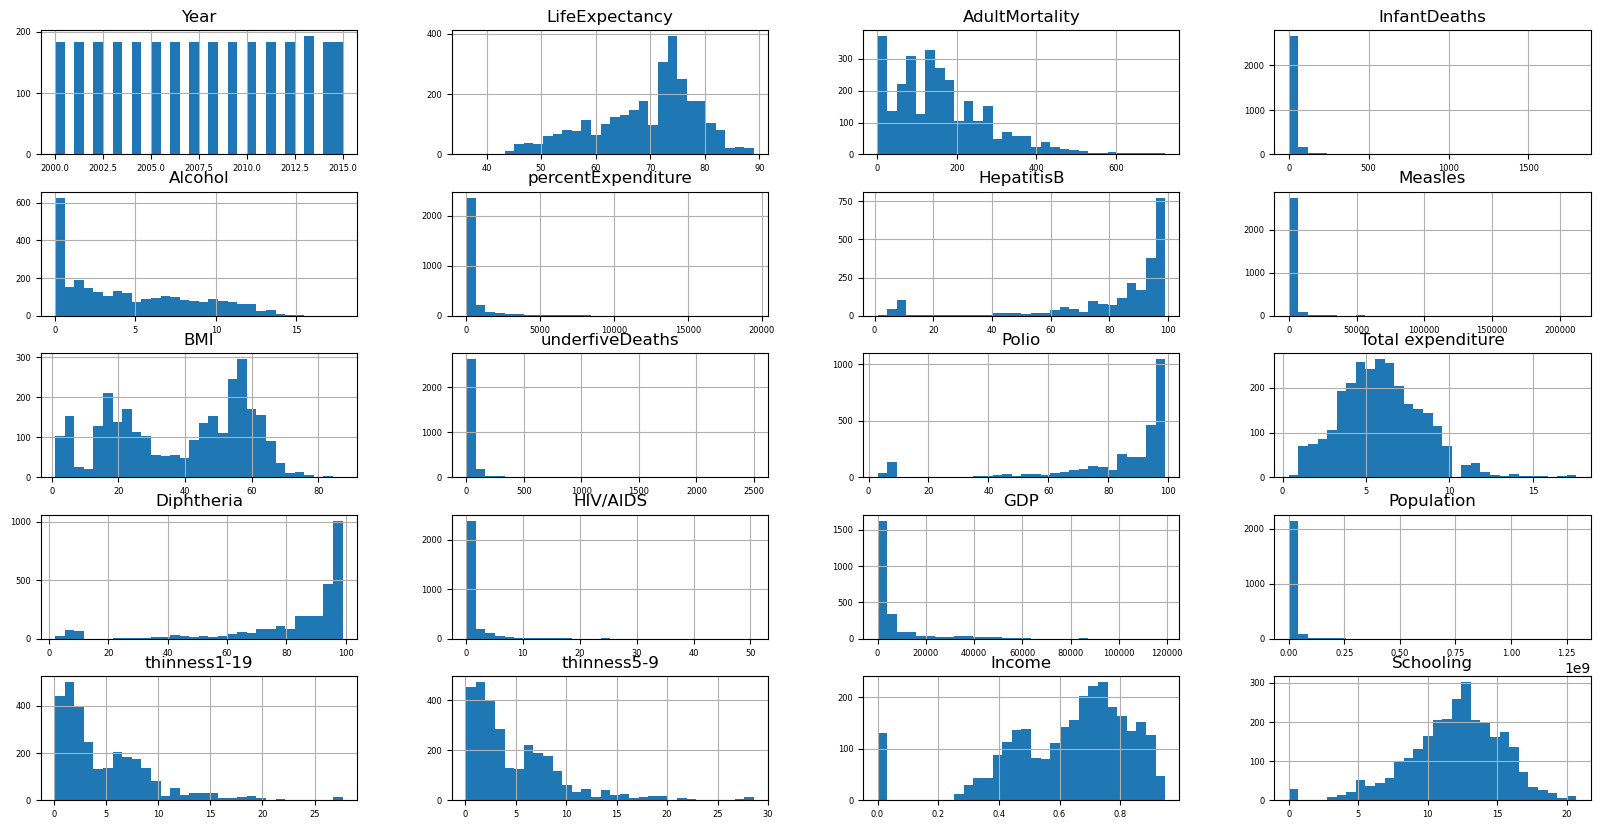

In [6]:
_ =data.hist(bins=30, figsize=(20, 10),xlabelsize=6, ylabelsize=6) # Histograma de las columnas

### Comprobamos los distintos valores de Status para entender cómo categorizarla en caso de que sea necesario.
Al tratarse de 2 posibles valores se podría realizar hot encoding con el siguiente comando:

data["Status"] = data["Status"].apply(lambda x: 1 if x == "Developed" else 0)   # 1 si es desarrollado, 0 si no

In [7]:
data["Status"].value_counts() # valores únicos de la columna Status (útil para saber cómo categorizar)

data["Status"] = data["Status"].apply(lambda x: 1 if x == "Developed" else 0)   # 1 si es desarrollado, 0 si no

### Comprobamos la cantidad de países para entender cómo categorizarlos si fuera necesario.

Podríamos categorizar los países cambiando el tipo de dato a category con el siguiente comando:

data["Country"] = data["Country"].astype("category")    # categorizamos la columna Country

In [8]:
unique_countries = data["Country"].unique().tolist()   # lista de países únicos
print(len(unique_countries))

data["Country"] = data["Country"].astype("category")    # categorizamos la columna Country

193


### Comprobar correlación entre columnas.

Ya que nuestra variable objetivo es LifeExpectancy vamos a comprobar la correlación de las features con ella

In [9]:
corr_matrix = data.corr(numeric_only=True) 

 # Correlación de la columna LifeExpectancy con las demás columnas
print(corr_matrix["LifeExpectancy"].sort_values(ascending=False, key=np.abs))

correlation = data["LifeExpectancy"].corr(data["Country"].cat.codes) # Correlación entre LifeExpectancy y Country. Tengo que hacerla aparte ya que Country es una variable categórica
print("Correlación Países:", correlation)



LifeExpectancy        1.000000
Schooling             0.751975
Income                0.724776
AdultMortality       -0.696359
BMI                   0.567694
HIV/AIDS             -0.556556
Status                0.482136
Diphtheria            0.479495
thinness1-19         -0.477183
thinness5-9          -0.471584
Polio                 0.465556
GDP                   0.461455
Alcohol               0.404877
percentExpenditure    0.381864
HepatitisB            0.256762
underfiveDeaths      -0.222529
Total expenditure     0.218086
InfantDeaths         -0.196557
Year                  0.170033
Measles              -0.157586
Population           -0.021538
Name: LifeExpectancy, dtype: float64
Correlación Países: -0.016762752240975592


### Quiero conocer las variable que contienen nulos y que correlan más para identificarlas y trabajar con ellas estos valores faltantes

In [10]:
#Opción 1 obtengo las columnas con valores nulos y luego selecciono las que tienen correlación mayor a threshold
columns_with_nulls = data.columns[data.isnull().any()] # Columnas con valores nulos

threshold = 0.4
correlation_with_target = data.corr(numeric_only=True)["LifeExpectancy"] # Correlación de las columnas numéricas con LifeExpectancy

selected_columns = [
    col for col in columns_with_nulls if  abs(correlation_with_target.get(col, 0)) > threshold # Seleccionamos las columnas con correlación mayor a threshold
]

print(selected_columns)


#Opción 2: Genero un dataframe con la cantidad de valores nulos, el porcentaje de valores nulos y la correlación con LifeExpectancy. Esto es bastante visual.
null_summary = pd.DataFrame({
    "Null Count": data.isna().sum(),
    "% Null": (data.isna().sum() / len(data)) * 100,
    "ABSCorrela": data.corr(numeric_only=True)["LifeExpectancy"].abs(),
    "Correla": data.corr(numeric_only=True)["LifeExpectancy"]
})

print(null_summary.sort_values(by="ABSCorrela",ascending=False)) # Resumen de valores nulos por columna en porcentaje


['LifeExpectancy', 'AdultMortality', 'Alcohol', 'BMI', 'Polio', 'Diphtheria', 'GDP', 'thinness1-19', 'thinness5-9', 'Income', 'Schooling']
                    Null Count     % Null  ABSCorrela   Correla
LifeExpectancy              10   0.340368    1.000000  1.000000
Schooling                  163   5.547992    0.751975  0.751975
Income                     167   5.684139    0.724776  0.724776
AdultMortality              10   0.340368    0.696359 -0.696359
BMI                         34   1.157250    0.567694  0.567694
HIV/AIDS                     0   0.000000    0.556556 -0.556556
Status                       0   0.000000    0.482136  0.482136
Diphtheria                  19   0.646698    0.479495  0.479495
thinness1-19                34   1.157250    0.477183 -0.477183
thinness5-9                 34   1.157250    0.471584 -0.471584
Polio                       19   0.646698    0.465556  0.465556
GDP                        448  15.248468    0.461455  0.461455
Alcohol                    19

## Tratamiento de faltantes

## Borrado de columnas
Voy a eliminar las columnas que contienen nulos y apenas correlan(Population,Total expenditure, HepatitisB)

In [11]:
train_set = train_set.drop(columns=["Population", "Total expenditure","HepatitisB"]) # Eliminamos la columna Population
train_set.head(20)


,Country,Year,Status,LifeExpectancy,AdultMortality,InfantDeaths,Alcohol,percentExpenditure,Measles,BMI,underfiveDeaths,Polio,Diphtheria,HIV/AIDS,GDP,thinness1-19,thinness5-9,Income,Schooling
456,Cabo Verde,2007,Developing,72.3,126.0,0,5.28,345.463714,0,25.5,0,98.0,98.0,0.6,3112.285712,8.1,8.0,0.602,11.9
462,Cabo Verde,2001,Developing,73.0,152.0,0,3.81,150.743486,0,22.1,0,91.0,9.0,0.8,1268.884564,9.4,9.3,0.562,11.0
2172,Saint Lucia,2011,Developing,74.6,143.0,0,10.43,0.000000,0,44.5,0,99.0,99.0,0.1,NaN,4.3,4.3,0.733,12.9
2667,Tunisia,2013,Developing,74.9,13.0,3,1.29,594.645310,16,59.3,3,98.0,98.0,0.1,4199.472530,6.4,6.3,0.720,14.7
381,Brunei Darussalam,2002,Developing,74.8,95.0,0,0.13,941.703687,0,28.0,0,99.0,94.0,0.1,16846.219800,6.7,6.1,0.820,13.3
847,Equatorial Guinea,2002,Developing,53.5,334.0,3,6.01,234.787421,24,19.1,4,44.0,36.0,2.9,2711.171140,1.4,1.3,0.542,8.2
1987,Papua New Guinea,2003,Developing,59.6,321.0,11,0.59,124.378936,3863,39.6,14,62.0,68.0,1.4,588.358260,1.5,1.4,0.433,7.2
790,Ecuador,2011,Developing,75.3,131.0,7,3.99,344.741216,257,51.4,8,85.0,88.0,0.1,5223.351763,1.3,1.2,0.710,13.2
1727,Mongolia,2004,Developing,64.0,284.0,2,1.75,73.241505,0,41.3,2,99.0,99.0,0.1,797.837743,2.3,2.4,0.621,11.2
2051,Poland,2003,Developed,74.7,142.0,3,9.06,542.023500,48,54.5,3,98.0,99.0,0.1,5693.524160,2.4,2.6,0.796,15.3


## Borrado de registros
Reviso los registros que tienen el campo Alcohol a null y observo que son todos de 2015, además observo que también hay nulos en Total expenditure, ceros en percentExpenditure y nulos en population por lo que puedo interpretar que al ser el último año puede que los datos estén incompletos y no sean fiables, así que borraré los registros de 2015.


In [12]:
train_set[train_set['Alcohol'].isna()].head(20) # Reviso los valores nulos de la columna Alcohol

train_set[train_set['Year'] == 2015].head(20) # Reviso los valores de la columna Year iguales a 2015

train_set.drop(train_set[train_set['Year'] == 2015].index, inplace=True) # Eliminamos los valores de la columna Year iguales a 2015 ya que veo que faltan muchos datos

#Vuelvo a consultar los datos
null_summary = pd.DataFrame({
    "Null Count": train_set.isna().sum(),
    "% Null": (train_set.isna().sum() / len(train_set)) * 100,
    "ABSCorrela": train_set.corr(numeric_only=True)["LifeExpectancy"].abs(),
    "Correla": train_set.corr(numeric_only=True)["LifeExpectancy"]
})

print(null_summary.sort_values(by="ABSCorrela",ascending=False)) # Resumen de valores nulos por columna en porcentaje



                    Null Count     % Null  ABSCorrela   Correla
LifeExpectancy               8   0.363636    1.000000  1.000000
Schooling                  121   5.500000    0.739009  0.739009
Income                     123   5.590909    0.718869  0.718869
AdultMortality               8   0.363636    0.699258 -0.699258
BMI                         25   1.136364    0.566979  0.566979
HIV/AIDS                     0   0.000000    0.561387 -0.561387
thinness1-19                25   1.136364    0.476096 -0.476096
thinness5-9                 25   1.136364    0.475793 -0.475793
Diphtheria                  14   0.636364    0.461370  0.461370
GDP                        324  14.727273    0.451610  0.451610
Polio                       14   0.636364    0.448316  0.448316
Alcohol                     14   0.636364    0.395386  0.395386
percentExpenditure           0   0.000000    0.393409  0.393409
underfiveDeaths              0   0.000000    0.225760 -0.225760
InfantDeaths                 0   0.00000

## Borrado de registros 2
Sigo revisando y compruebo que South Sudan tiene muchos datos nulos así que borraré estos registros.

In [13]:
train_set.drop(train_set[train_set['Country'] == "South Sudan"].index, inplace=True) # Eliminamos los valores de la columna Country iguales a South Sudan

train_set[train_set['Schooling'].isna()].head(20) # Valores nulos de la columna Alcohol


,Country,Year,Status,LifeExpectancy,AdultMortality,InfantDeaths,Alcohol,percentExpenditure,Measles,BMI,underfiveDeaths,Polio,Diphtheria,HIV/AIDS,GDP,thinness1-19,thinness5-9,Income,Schooling
435,Côte d'Ivoire,2012,Developing,52.0,415.0,59,3.24,0.0,137,26.2,82,83.0,82.0,2.9,NaN,5.9,5.9,NaN,NaN
736,Democratic Republic of the Congo,2000,Developing,51.3,346.0,226,1.98,0.0,8282,14.9,332,42.0,4.0,2.5,NaN,12.4,12.3,NaN,NaN
2774,United Kingdom of Great Britain and Northern I...,2003,Developed,78.3,86.0,4,11.85,0.0,460,59.5,4,91.0,91.0,0.1,NaN,0.7,0.5,NaN,NaN
2784,United Republic of Tanzania,2009,Developing,56.9,368.0,91,3.97,0.0,1574,2.2,135,88.0,85.0,6.4,NaN,7.2,7.2,NaN,NaN
2381,Somalia,2011,Developing,53.1,329.0,51,0.01,0.0,17298,22.4,82,49.0,41.0,0.8,NaN,6.9,6.7,NaN,NaN
445,Côte d'Ivoire,2002,Developing,47.7,473.0,65,3.13,0.0,5882,2.4,93,7.0,64.0,6.9,NaN,7.7,7.7,NaN,NaN
707,Democratic People's Republic of Korea,2013,Developing,71.0,146.0,6,3.35,0.0,0,31.8,8,99.0,93.0,0.1,NaN,5.0,5.0,NaN,NaN
2775,United Kingdom of Great Britain and Northern I...,2002,Developed,78.2,87.0,4,11.44,0.0,314,58.8,4,91.0,91.0,0.1,NaN,0.7,0.5,NaN,NaN
2380,Somalia,2012,Developing,53.1,336.0,51,0.01,0.0,9983,22.9,82,47.0,42.0,0.8,NaN,6.8,6.7,NaN,NaN
440,Côte d'Ivoire,2007,Developing,49.9,443.0,61,2.58,0.0,5,23.2,87,75.0,76.0,5.3,NaN,6.8,6.7,NaN,NaN


In [14]:
#Vuelvo a consultar los datos

null_summary = pd.DataFrame({
    "Null Count": train_set.isna().sum(),
    "% Null": (train_set.isna().sum() / len(train_set)) * 100,
    "ABSCorrela": train_set.corr(numeric_only=True)["LifeExpectancy"].abs(),
    "Correla": train_set.corr(numeric_only=True)["LifeExpectancy"]
})

print(null_summary.sort_values(by="ABSCorrela",ascending=False)) # Resumen de valores nulos por columna en porcentaje

train_set[train_set['GDP'].isna()].head(20) # Valores nulos de la columna Alcohol


                    Null Count     % Null  ABSCorrela   Correla
LifeExpectancy               8   0.365631    1.000000  1.000000
Schooling                  121   5.530165    0.736533  0.736533
Income                     123   5.621572    0.714727  0.714727
AdultMortality               8   0.365631    0.697424 -0.697424
BMI                         13   0.594150    0.566979  0.566979
HIV/AIDS                     0   0.000000    0.562776 -0.562776
thinness1-19                13   0.594150    0.476096 -0.476096
thinness5-9                 13   0.594150    0.475793 -0.475793
Diphtheria                   6   0.274223    0.459710  0.459710
GDP                        318  14.533821    0.451224  0.451224
Polio                        6   0.274223    0.446620  0.446620
Alcohol                      2   0.091408    0.395386  0.395386
percentExpenditure           0   0.000000    0.393076  0.393076
underfiveDeaths              0   0.000000    0.227215 -0.227215
InfantDeaths                 0   0.00000

,Country,Year,Status,LifeExpectancy,AdultMortality,InfantDeaths,Alcohol,percentExpenditure,Measles,BMI,underfiveDeaths,Polio,Diphtheria,HIV/AIDS,GDP,thinness1-19,thinness5-9,Income,Schooling
2172,Saint Lucia,2011,Developing,74.6,143.0,0,10.43,0.0,0,44.5,0,99.0,99.0,0.1,NaN,4.3,4.3,0.733,12.9
435,Côte d'Ivoire,2012,Developing,52.0,415.0,59,3.24,0.0,137,26.2,82,83.0,82.0,2.9,NaN,5.9,5.9,NaN,NaN
163,Bahamas,2012,Developing,74.9,167.0,0,9.50,0.0,0,62.6,0,99.0,98.0,0.2,NaN,2.5,2.5,0.789,12.6
1220,Iran (Islamic Republic of),2013,Developing,75.3,83.0,20,0.01,0.0,189,57.2,23,98.0,98.0,0.1,NaN,8.2,8.3,0.769,15.0
1421,Kyrgyzstan,2004,Developing,67.1,218.0,4,3.41,0.0,8,37.5,4,98.0,99.0,0.1,NaN,3.4,3.4,0.609,12.5
736,Democratic Republic of the Congo,2000,Developing,51.3,346.0,226,1.98,0.0,8282,14.9,332,42.0,4.0,2.5,NaN,12.4,12.3,NaN,NaN
2774,United Kingdom of Great Britain and Northern I...,2003,Developed,78.3,86.0,4,11.85,0.0,460,59.5,4,91.0,91.0,0.1,NaN,0.7,0.5,NaN,NaN
315,Bolivia (Plurinational State of),2004,Developing,65.1,226.0,12,2.66,0.0,0,45.4,16,84.0,84.0,0.2,NaN,1.4,1.2,0.620,14.6
2784,United Republic of Tanzania,2009,Developing,56.9,368.0,91,3.97,0.0,1574,2.2,135,88.0,85.0,6.4,NaN,7.2,7.2,NaN,NaN
1435,Lao People's Democratic Republic,2006,Developing,61.5,24.0,11,3.69,0.0,58,15.5,15,56.0,57.0,0.2,NaN,9.9,9.9,0.503,9.0


## Rellenar Datos

In [15]:
# Calcular la mediana de 'Alcohol' por país ya que me parece que el país es una variable importante para determinar el consumo de alcohol
medianas_por_pais = train_set.groupby('Country')['Alcohol'].median()

# Rellenar valores nulos de 'Alcohol' con la mediana correspondiente del país
train_set['Alcohol'] = train_set.apply(
    lambda row: medianas_por_pais[row['Country']] if pd.isnull(row['Alcohol']) else row['Alcohol'],
    axis=1
)


## Relleno los nulos con valores para poder avanzar en la parte de ejecución de los modelos.

In [16]:

# Rellenar los valores nulos con la media de cada columna
train_set.fillna(train_set.mean(numeric_only=True), inplace=True)


#Guardo la variable dependiente y elimino la columna de la variable dependiente
target_column = 'LifeExpectancy'

life_expectancy = train_set[target_column].copy() # Guardamos la variable dependiente en una variable aparte

train_set = train_set.drop(target_column, axis=1) # Eliminamos la columna de la variable dependiente del conjunto de entrenamiento

train_set = train_set.select_dtypes(include=[np.number]) # seleccionamos las columnas numéricas del conjunto de entrenamiento

#Vuelvo a consultar los datos

null_summary = pd.DataFrame({
    "Null Count": train_set.isna().sum(),
    "% Null": (train_set.isna().sum() / len(train_set)) * 100
})

print(null_summary.sort_values(by="% Null",ascending=False)) # Resumen de valores nulos por columna en porcentaje


                    Null Count  % Null
Year                         0     0.0
AdultMortality               0     0.0
InfantDeaths                 0     0.0
Alcohol                      0     0.0
percentExpenditure           0     0.0
Measles                      0     0.0
BMI                          0     0.0
underfiveDeaths              0     0.0
Polio                        0     0.0
Diphtheria                   0     0.0
HIV/AIDS                     0     0.0
GDP                          0     0.0
thinness1-19                 0     0.0
thinness5-9                  0     0.0
Income                       0     0.0
Schooling                    0     0.0


# Ejecución de modelos

## Modelo regresión lineal

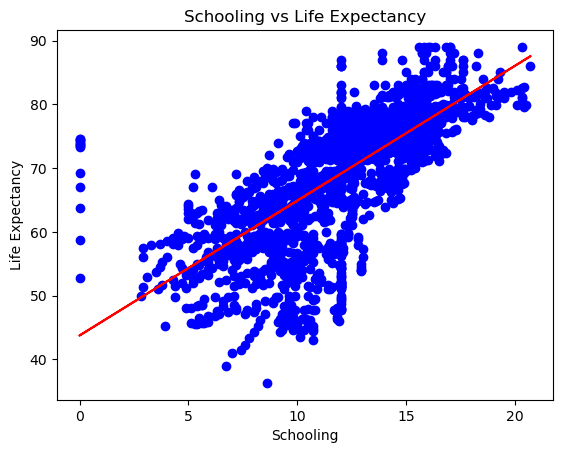

MSE: 46.643456116775546


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



# Escalamos los datos
std_scaler = StandardScaler()
train_set_std_scaled = std_scaler.fit_transform(train_set) # Escalamos los datos de entrenamiento

# Escalamos el target
target_scaler = StandardScaler() 
life_expectancy_std_scaled = target_scaler.fit_transform(life_expectancy.to_frame()) # Escalamos la variable dependiente

# Entrenamos el modelo de regresión lineal
schooling_scaled = train_set_std_scaled[:, train_set.columns.get_loc("Schooling")].reshape(-1, 1)
model = LinearRegression()
model.fit(schooling_scaled, life_expectancy_std_scaled)

# Predicciones
scaled_predictions = model.predict(schooling_scaled)
original_predictions = target_scaler.inverse_transform(scaled_predictions)

# Pintamos con los valores no escalados
plt.scatter(train_set["Schooling"], life_expectancy, color='blue')
plt.plot(train_set["Schooling"], original_predictions, color='red')
plt.xlabel("Schooling")
plt.ylabel("Life Expectancy")
plt.title("Schooling vs Life Expectancy")
plt.show()

# Calculamos el error cuadrático medio
mse = mean_squared_error(life_expectancy, original_predictions)
print("MSE:", mse)


## Modelo Random Forest

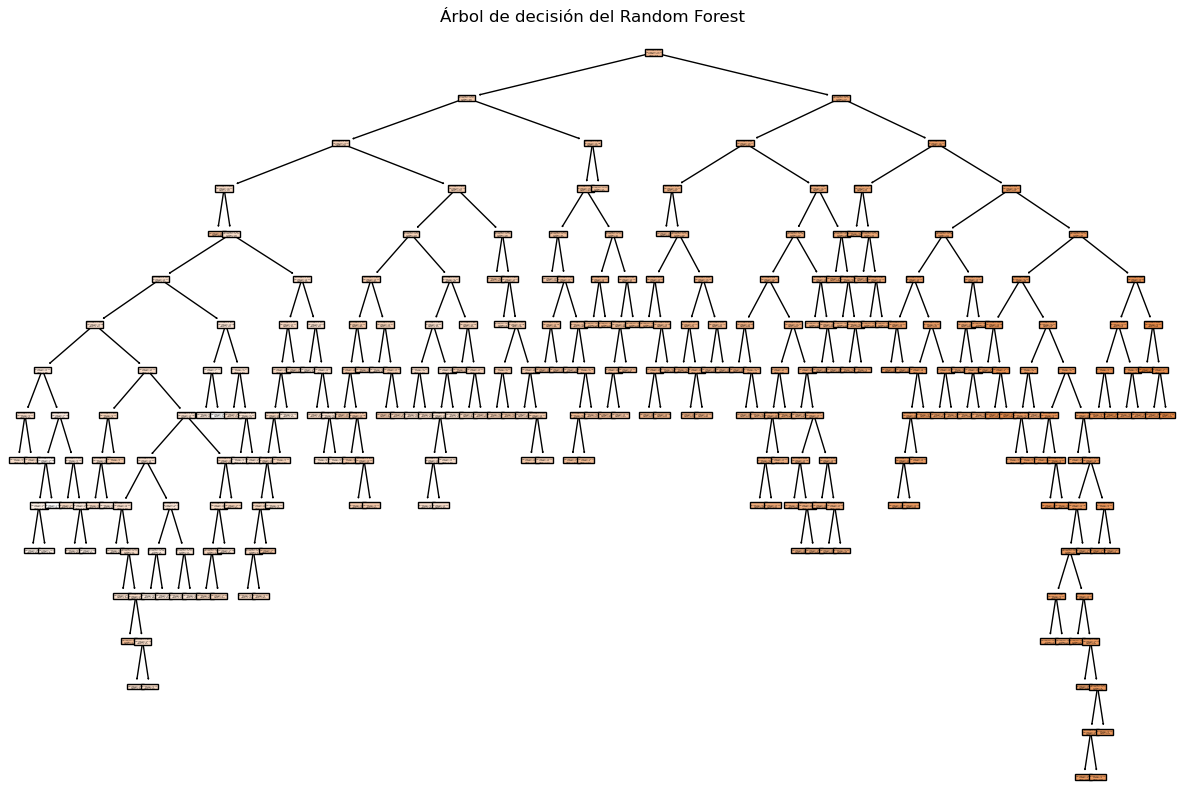

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

#Entrenamos el modelo de Random Forest
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(schooling_scaled, life_expectancy_std_scaled.ravel())

# Predicciones
scaled_predictions = model.predict(schooling_scaled)
original_predictions = target_scaler.inverse_transform(scaled_predictions.reshape(-1, 1))

# Seleccionamos el primer árbol del bosque
tree = model.estimators_[0]  # Primer árbol del Random Forest

# Visualizamos el árbol
plt.figure(figsize=(15, 10))
plot_tree(tree, feature_names=["Schooling"], filled=True)
plt.title("Árbol de decisión del Random Forest")
plt.show()


# Creación del pipeline

In [1]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Cargar el DataFrame
df = pd.read_csv('./data/life_expectancy.csv')

# Separar la variable objetivo y las características
target = 'LifeExpectancy'
X = df.drop(columns=[target])
y = df[target]

# Eliminar registros donde LifeExpectancy sea nulo
X = X[y.notnull()]
y = y.dropna()

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identificar variables categóricas y numéricas
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['number']).columns

# Crear el transformador para eliminar variables categóricas
drop_categorical = ('drop_cat', 'drop', categorical_cols)

# Crear el transformador para imputar valores numéricos y aplicar Z-score
impute_and_scale = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),  # Imputar la media
    ('scale', StandardScaler())                 # Aplicar Z-score
])

scale_numerical = ('scale_num', impute_and_scale, numerical_cols)

# Combinar transformadores en un ColumnTransformer
preprocessor = ColumnTransformer(transformers=[drop_categorical, scale_numerical])

# Crear el pipeline con el modelo de regresión lineal
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Ajustar el pipeline a los datos de entrenamiento
pipeline.fit(X_train, y_train)

# Hacer predicciones
y_pred = pipeline.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 15.84
R² Score: 0.82
